In [1100]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime
from dateutil.relativedelta import relativedelta

# Reading Data

In [1101]:
campaigns = pd.read_csv('./data/campaigns.csv')

donors = pd.read_csv('./data/donors.csv')

gifts = pd.read_csv('./data/gifts.csv')

campaigns_campaign_id = pd.read_csv('./data/selection campaign 6169.csv')

In [1102]:
end_date_for_ind_variable = datetime.datetime(2018, 8, 4)
campaign_launched = datetime.datetime(2018, 9, 4)
end_date_tar_variable = datetime.datetime(2019, 6, 18)
campaign_id = 6169

# GIFTS

### Checking data in gifts

In [1103]:

print(gifts.isna().sum().sum())
for column in gifts.columns[0:]:
    print(column + " " + str(gifts[column].isna().sum()))

gifts.info()

15637
Unnamed: 0 0
donorID 0
campaignID 15637
amount 0
date 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216594 entries, 0 to 216593
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  216594 non-null  int64  
 1   donorID     216594 non-null  int64  
 2   campaignID  200957 non-null  float64
 3   amount      216594 non-null  object 
 4   date        216594 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 8.3+ MB


### Cleaning data in gifts

In [1104]:
gifts['campaignID'] = gifts['campaignID'].fillna(0.0)
gifts['campaignID'] = gifts['campaignID'].astype(int)
gifts['amount'] = gifts['amount'].str.replace(",", ".").astype(float)
gifts['date'] = pd.to_datetime(gifts['date'])
gifts.rename(columns={'Unnamed: 0' : 'giftID'}, inplace=True)
gifts.head()

,giftID,donorID,campaignID,amount,date
0,0,100001,0,12.39,2004-03-23
1,1,100001,1577,12.39,2007-10-11
2,2,100001,1634,6.69,2007-12-28
3,3,100001,1778,24.79,2008-06-14
4,4,100001,1808,7.44,2008-07-09


### Adding columns to gift table

In [1105]:
gifts['Quater'] = np.where(gifts['date'].dt.month < 4, 'Q1', np.where(gifts['date'].dt.month < 7, 'Q2', np.where(gifts['date'].dt.month < 10, 'Q3','Q4')))
gifts.head()


,giftID,donorID,campaignID,amount,date,Quater
0,0,100001,0,12.39,2004-03-23,Q1
1,1,100001,1577,12.39,2007-10-11,Q4
2,2,100001,1634,6.69,2007-12-28,Q4
3,3,100001,1778,24.79,2008-06-14,Q2
4,4,100001,1808,7.44,2008-07-09,Q3


# DONORS

### Checking data in donors

In [1106]:
print(donors.isna().sum().sum())
for column in donors.columns[0:]:
    print(column + " " + str(donors[column].isna().sum()))
donors.head()

34
Unnamed: 0 0
donorID 0
zipcode 2
province 0
region 0
gender 32
language 0
dateOfBirth 0


,Unnamed: 0,donorID,zipcode,province,region,gender,language,dateOfBirth
0,0,100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967
1,1,100002,2260.0,Antwerp,Flanders,M,NL,01/14/1952
2,2,100003,1780.0,Flemish Brabant,Flanders,M,NL,12/23/1986
3,3,100004,1020.0,Brussels,Brussels,F,FR,03/29/1952
4,4,100005,1020.0,Brussels,Brussels,F,FR,06/25/1986


### Cleaning data in donors

In [1107]:
donors_zipcode_na = donors.loc[donors['zipcode'].isna(), :]
donors_zipcode_na.head()
donors['zipcode'] = donors['zipcode'].fillna(0)

In [1108]:
donors_gender_na = donors.loc[donors['gender'].isna(), :]
donors_gender_na.head()
donors['gender'] = donors['gender'].fillna('Not Known')

In [1109]:
donors.drop(['Unnamed: 0'] , axis = 1, inplace=True)
donors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   donorID      44691 non-null  int64  
 1   zipcode      44691 non-null  float64
 2   province     44691 non-null  object 
 3   region       44691 non-null  object 
 4   gender       44691 non-null  object 
 5   language     44691 non-null  object 
 6   dateOfBirth  44691 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.4+ MB


# CAMPAIGNS

### Checking data in campaigns

In [1110]:
print(campaigns.isna().sum().sum())
for column in campaigns.columns[0:]:
    print(column + " " + str(campaigns[column].isna().sum()))

campaigns.info()

0
campaignID;date;lettersSent;CostUnit 0
<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, 153;13/12/2004;6 873;0 to 7536;15/12/2019;37 187;0
Data columns (total 1 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   campaignID;date;lettersSent;CostUnit  367 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


In [1111]:
campaigns.head()

,campaignID;date;lettersSent;CostUnit
153;13/12/2004;6 873;0,17 €
154;01/01/2005;7 656;0,30 €
180;18/01/2005;9 933;0,20 €
433;29/01/2005;7 448;0,59 €
476;12/02/2005;6 605;0,51 €


### Cleaning data in campaigns

In [1112]:
campaigns = pd.read_csv('./data/campaigns.csv')
campaigns.rename(columns={campaigns.columns[0]: "Cost" }, inplace = True)
campaigns.index.names = ['campaignID;date;lettersSent;CostUnit']
campaigns_reset = campaigns.reset_index()
campaigns_split = campaigns_reset['campaignID;date;lettersSent;CostUnit'].str.split(';', expand=True)
campaigns_split['cost'] = campaigns_reset['Cost']
campaigns_split.rename(columns={0: "campaignID" }, inplace = True)
campaigns_split.rename(columns={1: "date" }, inplace = True)
campaigns_split.rename(columns={2: "lettersSent" }, inplace = True)
campaigns_split.drop([3] , axis = 1, inplace=True)
campaigns_split.head()

,campaignID,date,lettersSent,cost
0,153,13/12/2004,6 873,17 €
1,154,01/01/2005,7 656,30 €
2,180,18/01/2005,9 933,20 €
3,433,29/01/2005,7 448,59 €
4,476,12/02/2005,6 605,51 €


In [1113]:
campaigns_split['campaignID'] = campaigns_split['campaignID'].astype(int)
campaigns_split['date'] = pd.to_datetime(campaigns_split['date'])
campaigns_split['lettersSent'] = campaigns_split['lettersSent'].str.replace("\u202f", "").astype(int)
campaigns_split['cost'] = campaigns_split['cost'].str.replace("\xa0€", "").astype(int)
campaigns = campaigns_split
campaigns.head()


,campaignID,date,lettersSent,cost
0,153,2004-12-13,6873,17
1,154,2005-01-01,7656,30
2,180,2005-01-18,9933,20
3,433,2005-01-29,7448,59
4,476,2005-12-02,6605,51


In [1114]:
campaigns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   campaignID   367 non-null    int32         
 1   date         367 non-null    datetime64[ns]
 2   lettersSent  367 non-null    int32         
 3   cost         367 non-null    int32         
dtypes: datetime64[ns](1), int32(3)
memory usage: 7.3 KB


### Creating Features

In [1115]:
#Calculating summary for donors till Aug 4th 2018
gifts_donor_campaignID = gifts[gifts['date'] < end_date_for_ind_variable].groupby('donorID', as_index=False)['campaignID'].agg({'number_of_campaigns':'count'})
gifts_donor_total_amount = gifts[gifts['date'] < end_date_for_ind_variable].groupby('donorID', as_index=False)['amount'].agg({'total_amount':'sum'})
gifts_donor_last_date = gifts[gifts['date'] < end_date_for_ind_variable].groupby('donorID', as_index=False)['date'].agg({'last_date':'max'})
gifts_donor_last_date = gifts[gifts['date'] < end_date_for_ind_variable].groupby('donorID', as_index=False)['date'].agg({'last_date':'max'})
gifts_donor_quater_contribution = gifts[gifts['date'] < end_date_for_ind_variable].groupby(['donorID', 'Quater'], as_index=False)['date'].agg({'count'}).unstack('Quater')


donors = donors.merge(gifts_donor_campaignID, left_on = 'donorID', right_on = 'donorID', how = 'left')
donors = donors.merge(gifts_donor_total_amount, left_on = 'donorID', right_on = 'donorID', how = 'left')
donors = donors.merge(gifts_donor_last_date, left_on = 'donorID', right_on = 'donorID', how = 'left')
donors = donors.merge(gifts_donor_quater_contribution, left_on = 'donorID', right_on = 'donorID', how = 'left')

donors.rename(columns={('count', 'Q1') : 'Q1_Donations', ('count', 'Q2') : 'Q2_Donations', ('count', 'Q3') : 'Q3_Donations', ('count', 'Q4') : 'Q4_Donations'}, inplace = True)

donors['days_since_contributed'] = end_date_for_ind_variable - donors['last_date'] 
donors.head() 

C:\tools\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,donorID,zipcode,province,region,gender,language,dateOfBirth,number_of_campaigns,total_amount,last_date,Q1_Donations,Q2_Donations,Q3_Donations,Q4_Donations,days_since_contributed
0,100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967,12.0,178.49,2011-12-30,3.0,3.0,1.0,5.0,2409 days
1,100002,2260.0,Antwerp,Flanders,M,NL,01/14/1952,1.0,20.00,2015-01-10,1.0,NaN,NaN,NaN,1302 days
2,100003,1780.0,Flemish Brabant,Flanders,M,NL,12/23/1986,5.0,18.00,2018-07-08,NaN,1.0,4.0,NaN,27 days
3,100004,1020.0,Brussels,Brussels,F,FR,03/29/1952,26.0,716.22,2011-06-03,8.0,4.0,4.0,10.0,2619 days
4,100005,1020.0,Brussels,Brussels,F,FR,06/25/1986,4.0,14.96,2018-06-19,NaN,1.0,NaN,3.0,46 days


In [1116]:
#Calculating summary for donors till Aug 4th 2018
gifts_donor_summary = gifts[gifts['date'] < end_date_for_ind_variable].groupby(['donorID'], as_index=False)['amount'].agg(['mean', 'min', 'max'])
gifts_donor_quater_spending = gifts[gifts['date'] < end_date_for_ind_variable].groupby(['donorID', 'Quater'], as_index=False)['amount'].agg({'mean', 'min', 'max', 'sum'}).unstack('Quater')

donors = donors.merge(gifts_donor_summary, left_on = 'donorID', right_on = 'donorID', how = 'left')
donors = donors.merge(gifts_donor_quater_spending, left_on = 'donorID', right_on = 'donorID', how = 'left')
donors.head()
donors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44691 entries, 0 to 44690
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   donorID                 44691 non-null  int64          
 1   zipcode                 44691 non-null  float64        
 2   province                44691 non-null  object         
 3   region                  44691 non-null  object         
 4   gender                  44691 non-null  object         
 5   language                44691 non-null  object         
 6   dateOfBirth             44691 non-null  object         
 7   number_of_campaigns     44686 non-null  float64        
 8   total_amount            44686 non-null  float64        
 9   last_date               44686 non-null  datetime64[ns] 
 10  Q1_Donations            24165 non-null  float64        
 11  Q2_Donations            24288 non-null  float64        
 12  Q3_Donations            20617 no

C:\tools\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


In [1117]:
donors['days_since_contributed'] = donors['days_since_contributed'].dt.days
donors.fillna(0)

,donorID,zipcode,province,region,gender,language,dateOfBirth,number_of_campaigns,total_amount,last_date,...,"(mean, Q3)","(mean, Q4)","(min, Q1)","(min, Q2)","(min, Q3)","(min, Q4)","(max, Q1)","(max, Q2)","(max, Q3)","(max, Q4)"
0,100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967,12.0,178.49,2011-12-30 00:00:00,...,7.44,12.774,10.00,10.00,7.44,6.69,20.0,30.00,7.44,24.79
1,100002,2260.0,Antwerp,Flanders,M,NL,01/14/1952,1.0,20.00,2015-01-10 00:00:00,...,0.00,0.000,20.00,0.00,0.00,0.00,20.0,0.00,0.00,0.00
2,100003,1780.0,Flemish Brabant,Flanders,M,NL,12/23/1986,5.0,18.00,2018-07-08 00:00:00,...,3.50,0.000,0.00,4.00,3.00,0.00,0.0,4.00,5.00,0.00
3,100004,1020.0,Brussels,Brussels,F,FR,03/29/1952,26.0,716.22,2011-06-03 00:00:00,...,24.79,28.311,24.79,24.79,24.79,24.79,30.0,30.00,24.79,49.58
4,100005,1020.0,Brussels,Brussels,F,FR,06/25/1986,4.0,14.96,2018-06-19 00:00:00,...,0.00,3.320,0.00,5.00,0.00,2.48,0.0,5.00,0.00,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44686,144687,4900.0,Liege,Wallonia,M,FR,09/12/1970,1.0,10.00,2015-11-06 00:00:00,...,0.00,10.000,0.00,0.00,0.00,10.00,0.0,0.00,0.00,10.00
44687,144688,3600.0,Limburg,Flanders,M,NL,11/28/1972,7.0,48.56,2017-07-27 00:00:00,...,15.00,6.200,5.00,2.48,15.00,6.20,5.0,7.44,15.00,6.20
44688,144689,3061.0,Flemish Brabant,Flanders,M,NL,04/21/1967,2.0,124.79,2018-06-25 00:00:00,...,24.79,0.000,0.00,100.00,24.79,0.00,0.0,100.00,24.79,0.00
44689,144690,1950.0,Flemish Brabant,Flanders,M,FR,05/07/1976,1.0,40.00,2014-12-30 00:00:00,...,0.00,40.000,0.00,0.00,0.00,40.00,0.0,0.00,0.00,40.00


In [1118]:
#Calculating age for donors till Aug 4th 2018
donors.loc[:,'age'] = donors['dateOfBirth'].apply(lambda x : end_date_for_ind_variable.year - pd.to_datetime(x).year)
donors.loc[:,'age-group'] = donors['age'] // 10 * 10
donors.head()

,donorID,zipcode,province,region,gender,language,dateOfBirth,number_of_campaigns,total_amount,last_date,...,"(min, Q1)","(min, Q2)","(min, Q3)","(min, Q4)","(max, Q1)","(max, Q2)","(max, Q3)","(max, Q4)",age,age-group
0,100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967,12.0,178.49,2011-12-30,...,10.00,10.00,7.44,6.69,20.0,30.0,7.44,24.79,51,50
1,100002,2260.0,Antwerp,Flanders,M,NL,01/14/1952,1.0,20.00,2015-01-10,...,20.00,NaN,NaN,NaN,20.0,NaN,NaN,NaN,66,60
2,100003,1780.0,Flemish Brabant,Flanders,M,NL,12/23/1986,5.0,18.00,2018-07-08,...,NaN,4.00,3.00,NaN,NaN,4.0,5.00,NaN,32,30
3,100004,1020.0,Brussels,Brussels,F,FR,03/29/1952,26.0,716.22,2011-06-03,...,24.79,24.79,24.79,24.79,30.0,30.0,24.79,49.58,66,60
4,100005,1020.0,Brussels,Brussels,F,FR,06/25/1986,4.0,14.96,2018-06-19,...,NaN,5.00,NaN,2.48,NaN,5.0,NaN,5.00,32,30


In [1119]:
gifts.head()

,giftID,donorID,campaignID,amount,date,Quater
0,0,100001,0,12.39,2004-03-23,Q1
1,1,100001,1577,12.39,2007-10-11,Q4
2,2,100001,1634,6.69,2007-12-28,Q4
3,3,100001,1778,24.79,2008-06-14,Q2
4,4,100001,1808,7.44,2008-07-09,Q3


In [1120]:
campaigns_campaign_id.nunique()

donorID    34888
dtype: int64

In [1121]:
selected_donors = donors.merge(campaigns_campaign_id, left_on='donorID', right_on='donorID', how = 'inner')
selected_donors.head()
selected_donors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34874 entries, 0 to 34873
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   donorID                 34874 non-null  int64         
 1   zipcode                 34874 non-null  float64       
 2   province                34874 non-null  object        
 3   region                  34874 non-null  object        
 4   gender                  34874 non-null  object        
 5   language                34874 non-null  object        
 6   dateOfBirth             34874 non-null  object        
 7   number_of_campaigns     34869 non-null  float64       
 8   total_amount            34869 non-null  float64       
 9   last_date               34869 non-null  datetime64[ns]
 10  Q1_Donations            18769 non-null  float64       
 11  Q2_Donations            18686 non-null  float64       
 12  Q3_Donations            13955 non-null  float6

In [1122]:
donors 

,donorID,zipcode,province,region,gender,language,dateOfBirth,number_of_campaigns,total_amount,last_date,...,"(min, Q1)","(min, Q2)","(min, Q3)","(min, Q4)","(max, Q1)","(max, Q2)","(max, Q3)","(max, Q4)",age,age-group
0,100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967,12.0,178.49,2011-12-30,...,10.00,10.00,7.44,6.69,20.0,30.00,7.44,24.79,51,50
1,100002,2260.0,Antwerp,Flanders,M,NL,01/14/1952,1.0,20.00,2015-01-10,...,20.00,NaN,NaN,NaN,20.0,NaN,NaN,NaN,66,60
2,100003,1780.0,Flemish Brabant,Flanders,M,NL,12/23/1986,5.0,18.00,2018-07-08,...,NaN,4.00,3.00,NaN,NaN,4.00,5.00,NaN,32,30
3,100004,1020.0,Brussels,Brussels,F,FR,03/29/1952,26.0,716.22,2011-06-03,...,24.79,24.79,24.79,24.79,30.0,30.00,24.79,49.58,66,60
4,100005,1020.0,Brussels,Brussels,F,FR,06/25/1986,4.0,14.96,2018-06-19,...,NaN,5.00,NaN,2.48,NaN,5.00,NaN,5.00,32,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44686,144687,4900.0,Liege,Wallonia,M,FR,09/12/1970,1.0,10.00,2015-11-06,...,NaN,NaN,NaN,10.00,NaN,NaN,NaN,10.00,48,40
44687,144688,3600.0,Limburg,Flanders,M,NL,11/28/1972,7.0,48.56,2017-07-27,...,5.00,2.48,15.00,6.20,5.0,7.44,15.00,6.20,46,40
44688,144689,3061.0,Flemish Brabant,Flanders,M,NL,04/21/1967,2.0,124.79,2018-06-25,...,NaN,100.00,24.79,NaN,NaN,100.00,24.79,NaN,51,50
44689,144690,1950.0,Flemish Brabant,Flanders,M,FR,05/07/1976,1.0,40.00,2014-12-30,...,NaN,NaN,NaN,40.00,NaN,NaN,NaN,40.00,42,40


In [1123]:
# Checking for mutiple donations for campaign campaign_id
gifts1 = gifts[gifts['campaignID'] == campaign_id]
agg_gifts = gifts1.groupby(['donorID'])['date'].agg(['count']).sort_values(by = 'count', ascending =False)


In [1124]:
selected_donors = selected_donors.merge(gifts1, left_on='donorID', right_on='donorID', how = 'left')
# If Contribution made after May 18 

In [1125]:
selected_donors['amount'].fillna(0)
#selected_donors.loc[(selected_donors['amount'] > 30) and (selected_donors['date'] > campaign_launched) and (selected_donors['date'] < end_date_tar_variable), 'has_contributed'] = 1

selected_donors['has_contributed'] = np.where((selected_donors['amount'] > 30) & (selected_donors['date'] > campaign_launched) & (selected_donors['date'] < end_date_tar_variable),1, 0)

selected_donors.head()

,donorID,zipcode,province,region,gender,language,dateOfBirth,number_of_campaigns,total_amount,last_date,...,"(max, Q3)","(max, Q4)",age,age-group,giftID,campaignID,amount,date,Quater,has_contributed
0,100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967,12.0,178.49,2011-12-30,...,7.44,24.79,51,50,NaN,NaN,NaN,NaT,NaN,0
1,100002,2260.0,Antwerp,Flanders,M,NL,01/14/1952,1.0,20.00,2015-01-10,...,NaN,NaN,66,60,NaN,NaN,NaN,NaT,NaN,0
2,100004,1020.0,Brussels,Brussels,F,FR,03/29/1952,26.0,716.22,2011-06-03,...,24.79,49.58,66,60,NaN,NaN,NaN,NaT,NaN,0
3,100008,1780.0,Flemish Brabant,Flanders,M,FR,08/30/1937,3.0,124.37,2011-10-28,...,NaN,50.00,81,80,NaN,NaN,NaN,NaT,NaN,0
4,100009,1020.0,Brussels,Brussels,M,FR,01/20/1932,19.0,326.78,2012-03-25,...,25.00,20.00,86,80,NaN,NaN,NaN,NaT,NaN,0


In [1126]:
for column in selected_donors.columns:
    print(column)

donorID
zipcode
province
region
gender
language
dateOfBirth
number_of_campaigns
total_amount
last_date
Q1_Donations
Q2_Donations
Q3_Donations
Q4_Donations
days_since_contributed
mean
min
max
('sum', 'Q1')
('sum', 'Q2')
('sum', 'Q3')
('sum', 'Q4')
('mean', 'Q1')
('mean', 'Q2')
('mean', 'Q3')
('mean', 'Q4')
('min', 'Q1')
('min', 'Q2')
('min', 'Q3')
('min', 'Q4')
('max', 'Q1')
('max', 'Q2')
('max', 'Q3')
('max', 'Q4')
age
age-group
giftID
campaignID
amount
date
Quater
has_contributed


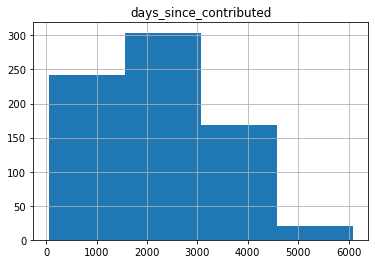

In [1127]:
selected_donors.loc[selected_donors['has_contributed'] == 1, :].hist('days_since_contributed', bins = 4)

selected_donors['class_based_on_last_contribution_day'] = np.where(selected_donors['days_since_contributed'] > 4500, 'D', np.where(selected_donors['days_since_contributed'] > 3000, 'C',  np.where(selected_donors['days_since_contributed'] > 1700, 'A', 'B')))

In [1128]:
selected_donors.loc[:,['days_since_contributed','class_based_on_last_contribution_day']]

,days_since_contributed,class_based_on_last_contribution_day
0,2409.0,A
1,1302.0,B
2,2619.0,A
3,2472.0,A
4,2323.0,A
...,...,...
34869,1194.0,B
34870,1002.0,B
34871,40.0,B
34872,1313.0,B


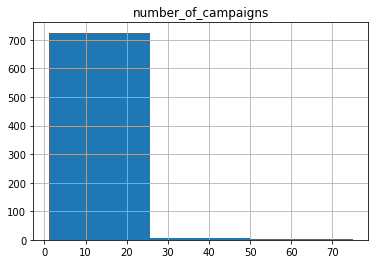

In [1129]:
selected_donors.loc[selected_donors['has_contributed'] == 1, :].hist('number_of_campaigns', bins = 3)
selected_donors['class_based_on_num_campaigns'] = np.where(selected_donors['number_of_campaigns'] < 25, 'A', np.where(selected_donors['number_of_campaigns'] < 50, 'B', 'C'))

In [1130]:
selected_donors.loc[:,['number_of_campaigns','class_based_on_last_contribution_day']]

,number_of_campaigns,class_based_on_last_contribution_day
0,12.0,A
1,1.0,B
2,26.0,A
3,3.0,A
4,19.0,A
...,...,...
34869,1.0,B
34870,1.0,B
34871,2.0,B
34872,1.0,B


In [1131]:
def assignlables_3bins(column, l1, l2):
    column_name = 'class_based_on_' + str(column)
    selected_donors.loc[selected_donors['has_contributed'] == 1, :].hist(column, bins = 3)
    selected_donors[column_name] = np.where(selected_donors[column] < l1, 'A', np.where(selected_donors[column] < l2, 'B', 'C'))
    print(selected_donors.loc[:,[column, column_name]])

In [1132]:
def assignlables_4bins(column, l1, l2, l3):
    column_name = 'class_based_on_' + str(column)
    selected_donors.loc[selected_donors['has_contributed'] == 1, :].hist(column, bins = 4)
    selected_donors[column_name] = np.where(selected_donors[column] < l1, 'A', np.where(selected_donors[column] < l2, 'B', np.where(selected_donors[column] < l3, 'C', 'D')))
    print(selected_donors.loc[:,[column, column_name]])

In [1133]:
def assignlables_2bins(column, l1):
    column_name = 'class_based_on_' + str(column)
    selected_donors.loc[selected_donors['has_contributed'] == 1, :].hist(column, bins = 2)
    selected_donors[column_name] = np.where(selected_donors[column] < l1, 'A', 'B')
    print(selected_donors.loc[:,[column, column_name]])

       Q1_Donations class_based_on_Q1_Donations
0               3.0                           A
1               1.0                           A
2               8.0                           A
3               NaN                           B
4               5.0                           A
...             ...                         ...
34869           NaN                           B
34870           NaN                           B
34871           NaN                           B
34872           NaN                           B
34873           NaN                           B

[34874 rows x 2 columns]


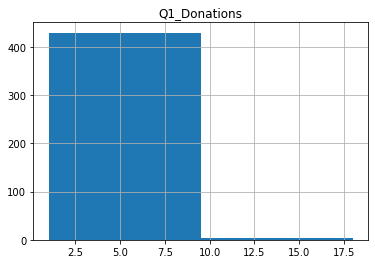

In [1134]:
assignlables_2bins('Q1_Donations', 9) 

       Q2_Donations class_based_on_Q2_Donations
0               3.0                           A
1               NaN                           B
2               4.0                           A
3               1.0                           A
4               4.0                           A
...             ...                         ...
34869           1.0                           A
34870           NaN                           B
34871           1.0                           A
34872           NaN                           B
34873           NaN                           B

[34874 rows x 2 columns]


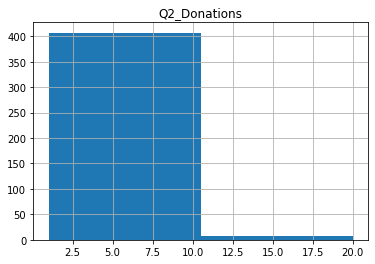

In [1135]:
assignlables_2bins('Q2_Donations', 9)

       Q3_Donations class_based_on_Q3_Donations
0               1.0                           A
1               NaN                           C
2               4.0                           A
3               NaN                           C
4               4.0                           A
...             ...                         ...
34869           NaN                           C
34870           NaN                           C
34871           1.0                           A
34872           NaN                           C
34873           NaN                           C

[34874 rows x 2 columns]


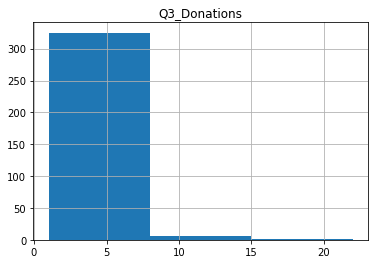

In [1136]:
assignlables_3bins('Q3_Donations', 8, 17) # 0-7 = A,  7-16 = B, C

       Q4_Donations class_based_on_Q4_Donations
0               5.0                           A
1               NaN                           C
2              10.0                           B
3               2.0                           A
4               6.0                           B
...             ...                         ...
34869           NaN                           C
34870           1.0                           A
34871           NaN                           C
34872           1.0                           A
34873           1.0                           A

[34874 rows x 2 columns]


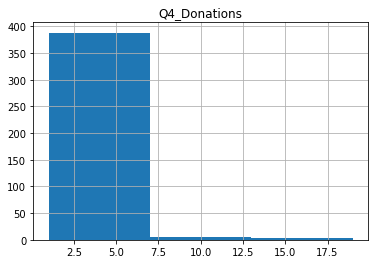

In [1137]:
assignlables_3bins('Q4_Donations',6, 14) # 0-5 = A,  5-13 = B, C

       total_amount class_based_on_total_amount
0            178.49                           A
1             20.00                           A
2            716.22                           A
3            124.37                           A
4            326.78                           A
...             ...                         ...
34869         50.00                           A
34870         10.00                           A
34871        124.79                           A
34872         40.00                           A
34873         39.00                           A

[34874 rows x 2 columns]


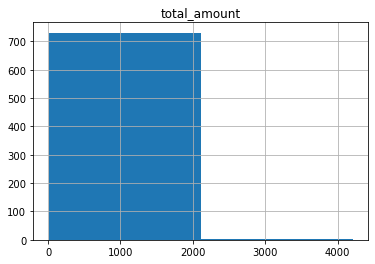

In [1138]:
assignlables_2bins('total_amount',2100) 

       age class_based_on_age
0       51                  B
1       66                  B
2       66                  B
3       81                  C
4       86                  C
...    ...                ...
34869   54                  B
34870   48                  A
34871   51                  B
34872   42                  A
34873   31                  A

[34874 rows x 2 columns]


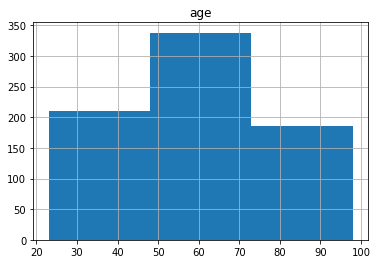

In [1139]:
assignlables_3bins('age',50, 72)

       age-group class_based_on_age-group
0             50                        B
1             60                        B
2             60                        B
3             80                        C
4             80                        C
...          ...                      ...
34869         50                        B
34870         40                        A
34871         50                        B
34872         40                        A
34873         30                        A

[34874 rows x 2 columns]


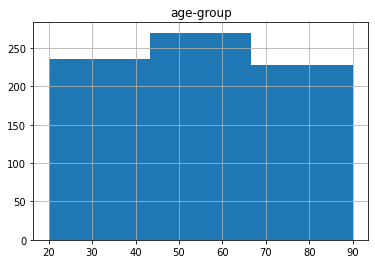

In [1140]:
assignlables_3bins('age-group',45, 65)

C:\tools\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


       (sum, Q1) class_based_on_('sum', 'Q1')
0          42.39                            A
1          20.00                            A
2         219.16                            A
3            NaN                            C
4          79.78                            A
...          ...                          ...
34869        NaN                            C
34870        NaN                            C
34871        NaN                            C
34872        NaN                            C
34873        NaN                            C

[34874 rows x 2 columns]


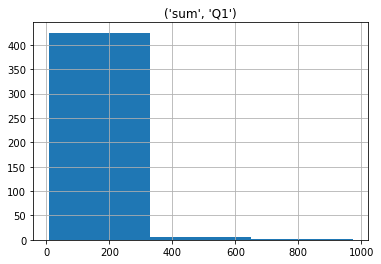

In [1141]:
assignlables_3bins(('sum', 'Q1'),250, 620)

C:\tools\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


       (sum, Q2) class_based_on_('sum', 'Q2')
0          64.79                            A
1            NaN                            C
2         114.79                            A
3          49.58                            A
4          67.39                            A
...          ...                          ...
34869      50.00                            A
34870        NaN                            C
34871     100.00                            A
34872        NaN                            C
34873        NaN                            C

[34874 rows x 2 columns]


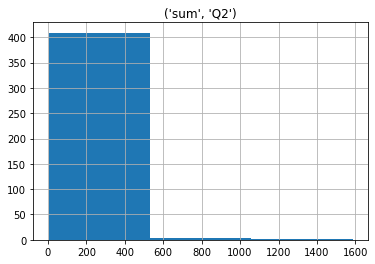

In [1142]:
assignlables_3bins(('sum', 'Q2'),450, 1000)

C:\tools\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


       (sum, Q3) class_based_on_('sum', 'Q3')
0           7.44                            A
1            NaN                            C
2          99.16                            A
3            NaN                            C
4          95.00                            A
...          ...                          ...
34869        NaN                            C
34870        NaN                            C
34871      24.79                            A
34872        NaN                            C
34873        NaN                            C

[34874 rows x 2 columns]


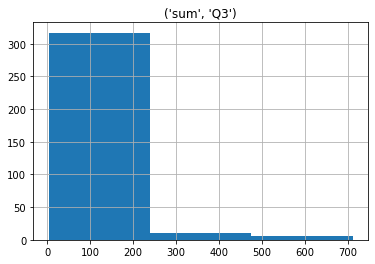

In [1143]:
assignlables_3bins(('sum', 'Q3'),250, 450)

C:\tools\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


       (sum, Q4) class_based_on_('sum', 'Q4')
0          63.87                            A
1            NaN                            C
2         283.11                            B
3          74.79                            A
4          84.61                            A
...          ...                          ...
34869        NaN                            C
34870      10.00                            A
34871        NaN                            C
34872      40.00                            A
34873      39.00                            A

[34874 rows x 2 columns]


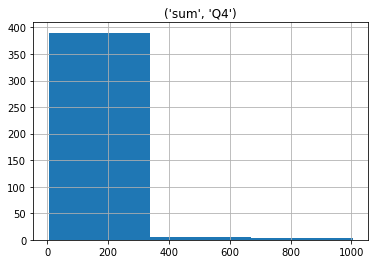

In [1144]:
assignlables_3bins(('sum', 'Q4'),250, 650)

C:\tools\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


       (min, Q1) class_based_on_('min', 'Q1')
0          10.00                            A
1          20.00                            A
2          24.79                            A
3            NaN                            C
4          12.39                            A
...          ...                          ...
34869        NaN                            C
34870        NaN                            C
34871        NaN                            C
34872        NaN                            C
34873        NaN                            C

[34874 rows x 2 columns]


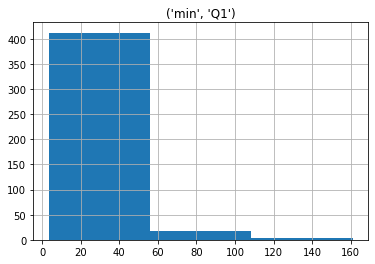

In [1145]:
assignlables_3bins(('min', 'Q1'),55, 110)

C:\tools\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


       (min, Q2) class_based_on_('min', 'Q2')
0          10.00                            A
1            NaN                            C
2          24.79                            A
3          49.58                            B
4          10.00                            A
...          ...                          ...
34869      50.00                            B
34870        NaN                            C
34871     100.00                            C
34872        NaN                            C
34873        NaN                            C

[34874 rows x 2 columns]


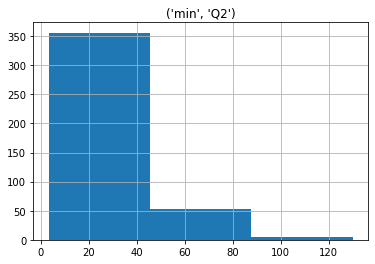

In [1146]:
assignlables_3bins(('min', 'Q2'),43, 83)

C:\tools\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


       (min, Q3) class_based_on_('min', 'Q3')
0           7.44                            A
1            NaN                            B
2          24.79                            A
3            NaN                            B
4          20.00                            A
...          ...                          ...
34869        NaN                            B
34870        NaN                            B
34871      24.79                            A
34872        NaN                            B
34873        NaN                            B

[34874 rows x 2 columns]


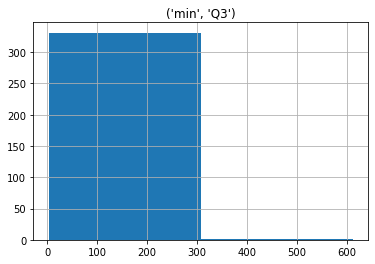

In [1147]:
assignlables_2bins(('min', 'Q3'),300)

C:\tools\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


       (min, Q4) class_based_on_('min', 'Q4')
0           6.69                            A
1            NaN                            C
2          24.79                            A
3          24.79                            A
4           7.44                            A
...          ...                          ...
34869        NaN                            C
34870      10.00                            A
34871        NaN                            C
34872      40.00                            A
34873      39.00                            A

[34874 rows x 2 columns]


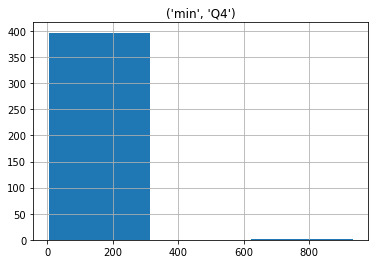

In [1148]:
assignlables_3bins(('min', 'Q4'),300, 650)

C:\tools\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


       (max, Q1) class_based_on_('max', 'Q1')
0           20.0                            A
1           20.0                            A
2           30.0                            A
3            NaN                            C
4           20.0                            A
...          ...                          ...
34869        NaN                            C
34870        NaN                            C
34871        NaN                            C
34872        NaN                            C
34873        NaN                            C

[34874 rows x 2 columns]


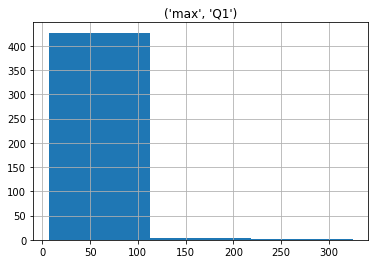

In [1149]:
assignlables_3bins(('max', 'Q1'),110, 220)

C:\tools\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


       (max, Q2) class_based_on_('max', 'Q2')
0          30.00                            A
1            NaN                            B
2          30.00                            A
3          49.58                            A
4          25.00                            A
...          ...                          ...
34869      50.00                            A
34870        NaN                            B
34871     100.00                            A
34872        NaN                            B
34873        NaN                            B

[34874 rows x 2 columns]


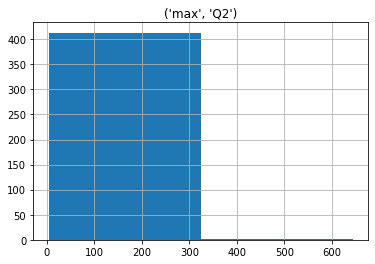

In [1150]:
assignlables_2bins(('max', 'Q2'),300)

C:\tools\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


       (max, Q3) class_based_on_('max', 'Q3')
0           7.44                            A
1            NaN                            C
2          24.79                            A
3            NaN                            C
4          25.00                            A
...          ...                          ...
34869        NaN                            C
34870        NaN                            C
34871      24.79                            A
34872        NaN                            C
34873        NaN                            C

[34874 rows x 2 columns]


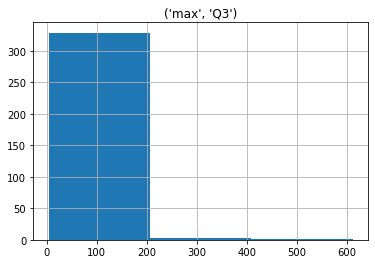

In [1151]:
assignlables_3bins(('max', 'Q3'),210, 410)

C:\tools\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


       (max, Q4) class_based_on_('max', 'Q4')
0          24.79                            A
1            NaN                            B
2          49.58                            A
3          50.00                            A
4          20.00                            A
...          ...                          ...
34869        NaN                            B
34870      10.00                            A
34871        NaN                            B
34872      40.00                            A
34873      39.00                            A

[34874 rows x 2 columns]


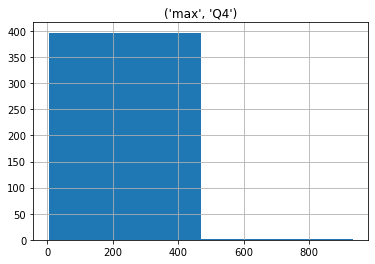

In [1152]:
assignlables_2bins(('max', 'Q4'),450)

C:\tools\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


       (mean, Q1) class_based_on_('mean', 'Q1')
0          14.130                             A
1          20.000                             A
2          27.395                             A
3             NaN                             B
4          15.956                             A
...           ...                           ...
34869         NaN                             B
34870         NaN                             B
34871         NaN                             B
34872         NaN                             B
34873         NaN                             B

[34874 rows x 2 columns]


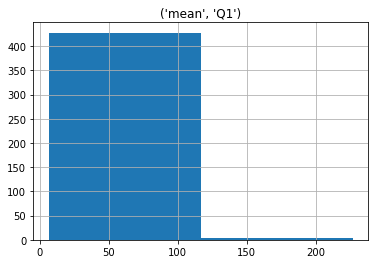

In [1153]:
assignlables_2bins(('mean', 'Q1'),110)

C:\tools\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


       (mean, Q1) class_based_on_('mean', 'Q1')
0          14.130                             A
1          20.000                             A
2          27.395                             A
3             NaN                             B
4          15.956                             A
...           ...                           ...
34869         NaN                             B
34870         NaN                             B
34871         NaN                             B
34872         NaN                             B
34873         NaN                             B

[34874 rows x 2 columns]


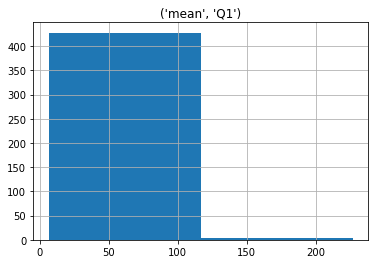

In [1154]:
assignlables_2bins(('mean', 'Q1'),110)

C:\tools\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


       (mean, Q2) class_based_on_('mean', 'Q2')
0       21.596667                             A
1             NaN                             B
2       28.697500                             A
3       49.580000                             A
4       16.847500                             A
...           ...                           ...
34869   50.000000                             A
34870         NaN                             B
34871  100.000000                             A
34872         NaN                             B
34873         NaN                             B

[34874 rows x 2 columns]


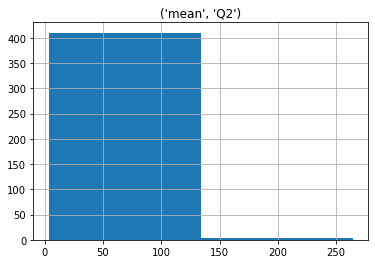

In [1155]:
assignlables_2bins(('mean', 'Q2'),130)

C:\tools\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


       (mean, Q3) class_based_on_('mean', 'Q3')
0            7.44                             A
1             NaN                             B
2           24.79                             A
3             NaN                             B
4           23.75                             A
...           ...                           ...
34869         NaN                             B
34870         NaN                             B
34871       24.79                             A
34872         NaN                             B
34873         NaN                             B

[34874 rows x 2 columns]


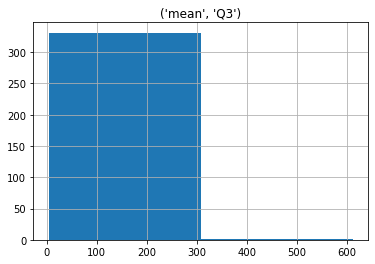

In [1156]:
assignlables_2bins(('mean', 'Q3'),310)

C:\tools\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


       (mean, Q4) class_based_on_('mean', 'Q4')
0       12.774000                             A
1             NaN                             B
2       28.311000                             A
3       37.395000                             A
4       14.101667                             A
...           ...                           ...
34869         NaN                             B
34870   10.000000                             A
34871         NaN                             B
34872   40.000000                             A
34873   39.000000                             A

[34874 rows x 2 columns]


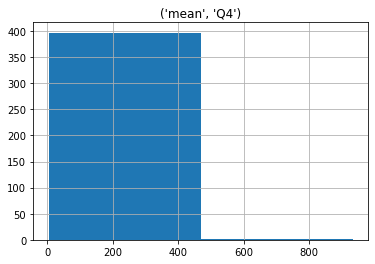

In [1157]:
assignlables_2bins(('mean', 'Q4'),450)

In [1158]:
for column in selected_donors[0:]:
    print(column)

donorID
zipcode
province
region
gender
language
dateOfBirth
number_of_campaigns
total_amount
last_date
Q1_Donations
Q2_Donations
Q3_Donations
Q4_Donations
days_since_contributed
mean
min
max
('sum', 'Q1')
('sum', 'Q2')
('sum', 'Q3')
('sum', 'Q4')
('mean', 'Q1')
('mean', 'Q2')
('mean', 'Q3')
('mean', 'Q4')
('min', 'Q1')
('min', 'Q2')
('min', 'Q3')
('min', 'Q4')
('max', 'Q1')
('max', 'Q2')
('max', 'Q3')
('max', 'Q4')
age
age-group
giftID
campaignID
amount
date
Quater
has_contributed
class_based_on_last_contribution_day
class_based_on_num_campaigns
class_based_on_Q1_Donations
class_based_on_Q2_Donations
class_based_on_Q3_Donations
class_based_on_Q4_Donations
class_based_on_total_amount
class_based_on_age
class_based_on_age-group
class_based_on_('sum', 'Q1')
class_based_on_('sum', 'Q2')
class_based_on_('sum', 'Q3')
class_based_on_('sum', 'Q4')
class_based_on_('min', 'Q1')
class_based_on_('min', 'Q2')
class_based_on_('min', 'Q3')
class_based_on_('min', 'Q4')
class_based_on_('max', 'Q1')
cla

In [1159]:
selected_donors.province = np.where(selected_donors.province == 'ANTWERP', 'Antwerp', selected_donors.province)

number_of_cont_per_district = selected_donors.loc[selected_donors['has_contributed'] == 1, :].groupby('province')['donorID'].count()

selected_donors = selected_donors.merge(number_of_cont_per_district, left_on = 'province', right_on = 'province', how = 'left')


       donorID_y class_based_on_donorID_y
0            124                        C
1            177                        D
2             15                        A
3            124                        C
4             15                        A
...          ...                      ...
34869        177                        D
34870         12                        A
34871        124                        C
34872        124                        C
34873         15                        A

[34874 rows x 2 columns]


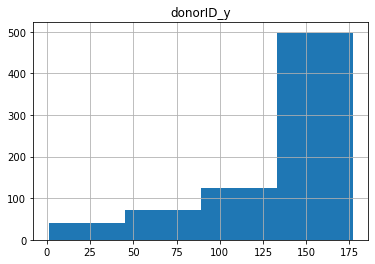

In [1160]:
assignlables_4bins('donorID_y', 40, 80, 130)

In [1161]:
selected_donors.head()

,donorID_x,zipcode,province,region,gender,language,dateOfBirth,number_of_campaigns,total_amount,last_date,...,"class_based_on_('max', 'Q1')","class_based_on_('max', 'Q2')","class_based_on_('max', 'Q3')","class_based_on_('max', 'Q4')","class_based_on_('mean', 'Q1')","class_based_on_('mean', 'Q2')","class_based_on_('mean', 'Q3')","class_based_on_('mean', 'Q4')",donorID_y,class_based_on_donorID_y
0,100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967,12.0,178.49,2011-12-30,...,A,A,A,A,A,A,A,A,124,C
1,100002,2260.0,Antwerp,Flanders,M,NL,01/14/1952,1.0,20.00,2015-01-10,...,A,B,C,B,A,B,B,B,177,D
2,100004,1020.0,Brussels,Brussels,F,FR,03/29/1952,26.0,716.22,2011-06-03,...,A,A,A,A,A,A,A,A,15,A
3,100008,1780.0,Flemish Brabant,Flanders,M,FR,08/30/1937,3.0,124.37,2011-10-28,...,C,A,C,A,B,A,B,A,124,C
4,100009,1020.0,Brussels,Brussels,M,FR,01/20/1932,19.0,326.78,2012-03-25,...,A,A,A,A,A,A,A,A,15,A


In [1162]:
selected_donors['class_based_on_region'] = np.where(selected_donors.region == 'Flanders', 'A', np.where(selected_donors.region == 'Wallonia', 'B', np.where(selected_donors.region == 'Brussels', 'C', 'D')))

selected_donors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34874 entries, 0 to 34873
Data columns (total 70 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   donorID_x                             34874 non-null  int64         
 1   zipcode                               34874 non-null  float64       
 2   province                              34874 non-null  object        
 3   region                                34874 non-null  object        
 4   gender                                34874 non-null  object        
 5   language                              34874 non-null  object        
 6   dateOfBirth                           34874 non-null  object        
 7   number_of_campaigns                   34869 non-null  float64       
 8   total_amount                          34869 non-null  float64       
 9   last_date                             34869 non-null  datetime64[ns]
 10

In [1163]:
number_of_cont_per_language = selected_donors.loc[selected_donors['has_contributed'] == 1, :].groupby('language')['donorID_y'].count()
number_of_cont_per_language

language
EN      1
FR     42
NL    691
Name: donorID_y, dtype: int64

In [1164]:
selected_donors['language'] = np.where(selected_donors.language == 'EN', 'C', np.where(selected_donors.language == 'FR', 'B','A'))

selected_donors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34874 entries, 0 to 34873
Data columns (total 70 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   donorID_x                             34874 non-null  int64         
 1   zipcode                               34874 non-null  float64       
 2   province                              34874 non-null  object        
 3   region                                34874 non-null  object        
 4   gender                                34874 non-null  object        
 5   language                              34874 non-null  object        
 6   dateOfBirth                           34874 non-null  object        
 7   number_of_campaigns                   34869 non-null  float64       
 8   total_amount                          34869 non-null  float64       
 9   last_date                             34869 non-null  datetime64[ns]
 10

In [1165]:
from sklearn.preprocessing import LabelEncoder
X =  selected_donors.drop({'has_contributed','last_date', 'dateOfBirth', 'date'}, axis = 1)
print(X.head())
encoder = LabelEncoder()
for column in X.columns[0:]:
    if X[column].dtype == object:
        X[column] = encoder.fit_transform(X[column])

X.fillna(0)


   donorID_x  zipcode         province    region gender language  \
0     100001   1861.0  Flemish Brabant  Flanders      F        A   
1     100002   2260.0          Antwerp  Flanders      M        A   
2     100004   1020.0         Brussels  Brussels      F        B   
3     100008   1780.0  Flemish Brabant  Flanders      M        B   
4     100009   1020.0         Brussels  Brussels      M        B   

   number_of_campaigns  total_amount  Q1_Donations  Q2_Donations  ...  \
0                 12.0        178.49           3.0           3.0  ...   
1                  1.0         20.00           1.0           NaN  ...   
2                 26.0        716.22           8.0           4.0  ...   
3                  3.0        124.37           NaN           1.0  ...   
4                 19.0        326.78           5.0           4.0  ...   

   class_based_on_('max', 'Q2')  class_based_on_('max', 'Q3')  \
0                             A                             A   
1                     

,donorID_x,zipcode,province,region,gender,language,number_of_campaigns,total_amount,Q1_Donations,Q2_Donations,...,"class_based_on_('max', 'Q2')","class_based_on_('max', 'Q3')","class_based_on_('max', 'Q4')","class_based_on_('mean', 'Q1')","class_based_on_('mean', 'Q2')","class_based_on_('mean', 'Q3')","class_based_on_('mean', 'Q4')",donorID_y,class_based_on_donorID_y,class_based_on_region
0,100001,1861.0,3,1,0,0,12.0,178.49,3.0,3.0,...,0,0,0,0,0,0,0,124,2,0
1,100002,2260.0,0,1,1,0,1.0,20.00,1.0,0.0,...,1,2,1,0,1,1,1,177,3,0
2,100004,1020.0,1,0,0,1,26.0,716.22,8.0,4.0,...,0,0,0,0,0,0,0,15,0,2
3,100008,1780.0,3,1,1,1,3.0,124.37,0.0,1.0,...,0,2,0,1,0,1,0,124,2,0
4,100009,1020.0,1,0,1,1,19.0,326.78,5.0,4.0,...,0,0,0,0,0,0,0,15,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34869,144686,2440.0,0,1,0,0,1.0,50.00,0.0,1.0,...,0,2,1,1,0,1,1,177,3,0
34870,144687,4900.0,5,3,1,1,1.0,10.00,0.0,0.0,...,1,2,0,1,1,1,0,12,0,1
34871,144689,3061.0,3,1,1,0,2.0,124.79,0.0,1.0,...,0,0,1,1,0,0,1,124,2,0
34872,144690,1950.0,3,1,1,1,1.0,40.00,0.0,0.0,...,1,2,0,1,1,1,0,124,2,0


In [1170]:
X = X.fillna(0.0)
X.isna().sum().sum()

0

In [1180]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

y = selected_donors['has_contributed']
logreg = LogisticRegression(random_state=0, max_iter=1)
    # split in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg.fit(X_train, y_train)

# predict probabilities
pred_train = logreg.predict(X_train)
pred_test = logreg.predict(X_test)

# evaluate predictions
mlp_acc_train = accuracy_score(y_train, pred_train)
mlp_acc_test = accuracy_score(y_test, pred_test)

eval_dict = {"logreg": {"Acc_train": mlp_acc_train, "Acc_test": mlp_acc_test}}
eval_dict


C:\tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\tools\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\tools\Anaco

{'logreg': {'Acc_train': 0.9795993609438368, 'Acc_test': 0.9774443276306987}}

In [1174]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])

C:\tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


0.9991873690811939

In [1182]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score



X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )
    # Neural Network
mlp = MLPClassifier(
        hidden_layer_sizes=(32, 16, 16),
        batch_size=32,
        early_stopping=False,
        random_state=42,
    )
mlp = mlp.fit(X_train, y_train)

    # predict probabilities
pred_train = mlp.predict(X_train)
pred_test = mlp.predict(X_test)

    # evaluate predictions
mlp_acc_train = accuracy_score(y_train, pred_train)
mlp_acc_test = accuracy_score(y_test, pred_test)

eval_dict = {"NN": {"Acc_train": mlp_acc_train, "Acc_test": mlp_acc_test}}
eval_dict

C:\tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


{'NN': {'Acc_train': 0.9870963116957597, 'Acc_test': 0.9881003584229391}}

In [1184]:
roc_auc_score(y_test, mlp.predict_proba(X_test)[:, 1])

C:\tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


0.9938854715875806

In [1183]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, stratify=y, random_state=42
    )
rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf.fit(X_train, y_train)

    # predict probabilities
pred_train = rf.predict(X_train)
pred_test = rf.predict(X_test)

    # evaluate predictions
mlp_acc_train = accuracy_score(y_train, pred_train)
mlp_acc_test = accuracy_score(y_test, pred_test)

eval_dict = {"RF": {"Acc_train": mlp_acc_train, "Acc_test": mlp_acc_test}}
eval_dict

C:\tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


{'RF': {'Acc_train': 0.9981839036513095, 'Acc_test': 0.9979211469534051}}